#### PURPOSE : FINAL ANALYSIS 

This notebook performs the final analysis of the trained machine learning model using the fully integrated preprocessing–model pipeline saved during training. The pipeline is loaded to ensure consistent data transformation and accurate interpretation of model behavior. The analysis includes extracting the underlying raw model, generating feature importance scores, and applying SHAP (SHapley Additive exPlanations) to explain individual and global prediction patterns. These visualizations and metrics provide insights into how each feature influences the model’s decision-making process, supporting transparency, interpretability, and robust evaluation of the final predictive system.

In [14]:
%run 00_project_setup.ipynb
%run 04_feature_engineering.ipynb

Original: (4424, 15)
After outlier removal: (4335, 15)


##### 1. Load the Saved Pipeline

In [2]:

pipeline = load("../outputs/models/best_pipeline.joblib")
print("Pipeline loaded successfully!")

Pipeline loaded successfully!


##### 2. Extract the Raw Model from Inside the Pipeline

In [3]:
pipeline.named_steps   

{'imputer': SimpleImputer(strategy='median'),
 'scaler': StandardScaler(),
 'clf': LGBMClassifier(colsample_bytree=0.8, max_depth=3, n_estimators=50, n_jobs=-1,
                num_leaves=15, random_state=42, subsample=0.8, verbose=-1)}

In [4]:
raw_model = pipeline.named_steps["clf"]
print(raw_model)

LGBMClassifier(colsample_bytree=0.8, max_depth=3, n_estimators=50, n_jobs=-1,
               num_leaves=15, random_state=42, subsample=0.8, verbose=-1)


In [5]:
importances = raw_model.feature_importances_
feature_names = pipeline.named_steps["imputer"].get_feature_names_out()

fi = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

fi.head(10)


,Feature,Importance
0,Curricular units 2nd sem (approved),154
8,Age at enrollment,104
7,Course,86
2,Curricular units 2nd sem (grade),73
14,Mother's occupation,73
11,Curricular units 1st sem (approved),72
1,Tuition fees up to date,66
10,Curricular units 2nd sem (evaluations),64
3,Admission grade,60
6,Curricular units 2nd sem (enrolled),58


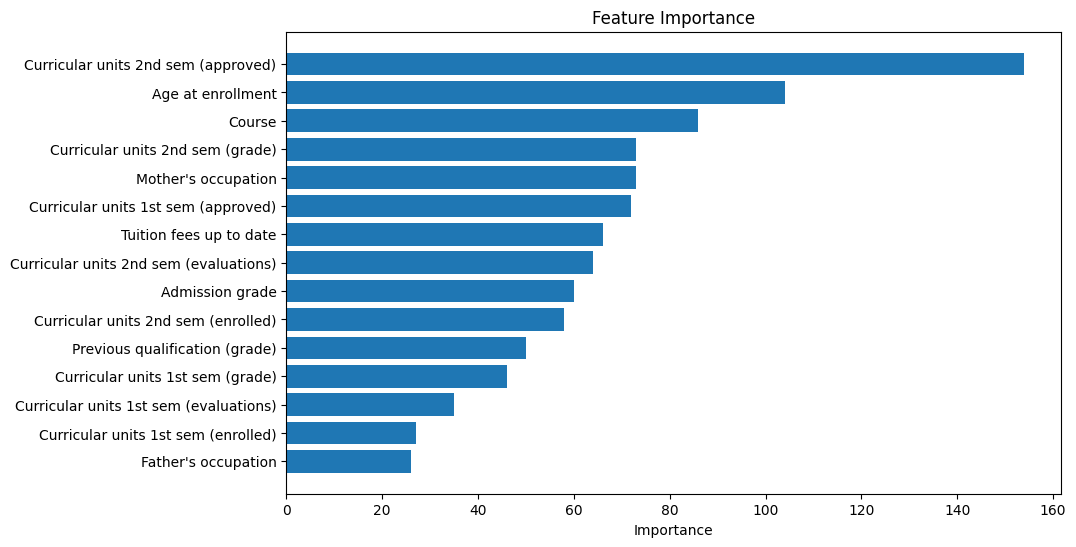

In [6]:
plt.figure(figsize=(10,6))
plt.barh(fi["Feature"], fi["Importance"])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


##### 4. SHAP Analysis

###### Create SHAP explainer

In [16]:
explainer = shap.TreeExplainer(raw_model)
shap_values = explainer.shap_values(X_test)

###### SHAP Summary Plot

<Figure size 640x480 with 0 Axes>

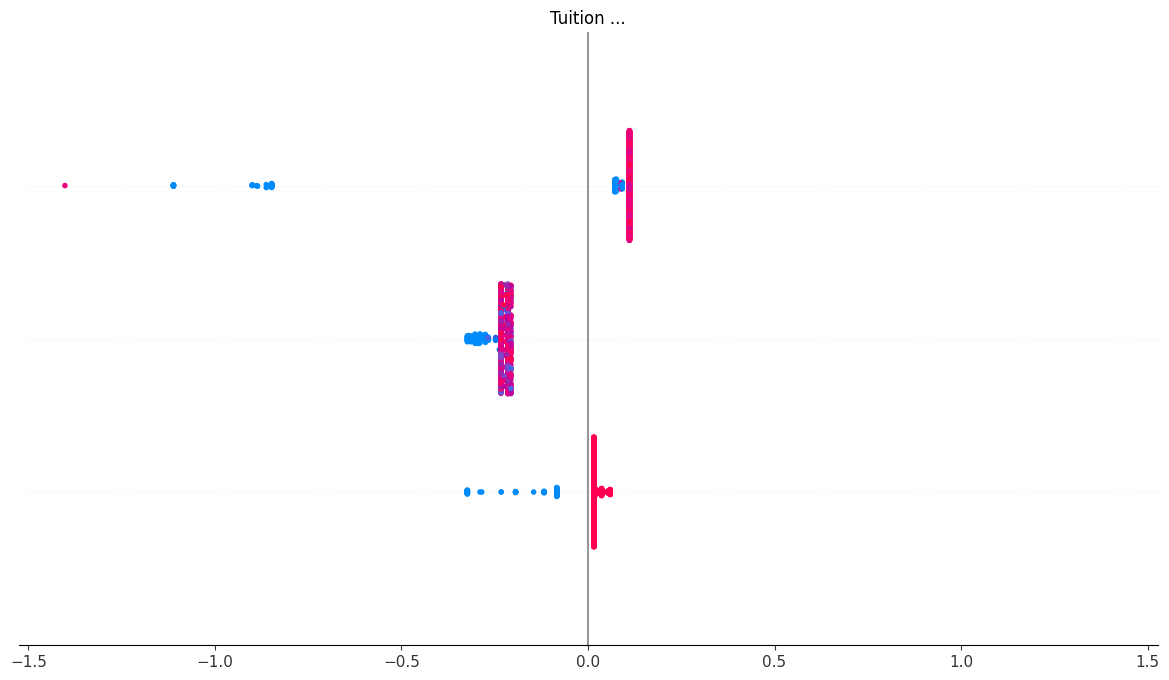

In [19]:
shap.summary_plot(shap_values, 
                  X_test, 
                  feature_names=feature_names)
